In [2]:
import sys, importlib
sys.path.append('/Users/elliottunstall/Desktop/Imperial/FYP/codebase/utils')
from registration_toolkit import registration, registration_plot_from_np, plot_image_grid, transform_2_displacement_field
importlib.reload(sys.modules['registration_toolkit'])
from registration_toolkit import registration, registration_plot_from_np, plot_image_grid
from helpers import *
import cv2
import ants
import matplotlib.pyplot as plt
import leafmap

In [3]:
## SETTINGS
type_of_transform = 'SyN'
syn_metric = 'demons'

In [4]:
## Load Video

path = '/Users/elliottunstall/Desktop/Imperial/FYP/Clinical BMode heart acquisitions/12_Clinical_20230421_114731_VERASONICS_HFR016_BMode_IM_0197.avi' # change path 
cap = cv2.VideoCapture(path)

data = np.zeros([600,800,3,36])
i = 0
while cap.isOpened():
    ret, frame = cap.read()  
    if ret:
        data[:,:,:,i] = frame
        i += 1
    else:
        break

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):

            # Release the video capture object and close all windows
        cap.release()
        cv2.destroyAllWindows()
            
        break

OpenCV: Couldn't read video stream from file "/Users/elliottunstall/Desktop/Imperial/Year 4/Masters Project/Clinical BMode heart acquisitions/12_Clinical_20230421_114731_VERASONICS_HFR016_BMode_IM_0197.avi"


In [5]:
## Register images

registration_collection = []

for i in range(4,32,8):
    image_row = []
    image_row.append(data[:,:,0,i])
    fixed = ants.from_numpy(data[:,:,0,i])

    for j in range(0,5):
        if j!=2:
            moving = ants.from_numpy(data[:,:,0,i-4+(2*j)])
            warped_image = registration(fixed, moving, type_of_transform=type_of_transform, syn_metric=syn_metric)
            np_reg = np.asarray(warped_image.numpy())
            image_row.append(np_reg)
    registration_collection.append(image_row)

registration_collection = np.array(registration_collection)
registration_plot_from_np(registration_collection, 3, 5, number_of_figures=1)


Exception Object caught: 

itk::ExceptionObject (0x7fb59df92e30)
Location: "unknown" 
File: /Users/runner/work/ANTsPy/ANTsPy/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 124
Description: ITK ERROR: ImageMomentsCalculator(0x7fb59ca936a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




RuntimeError: Registration failed with error code 1

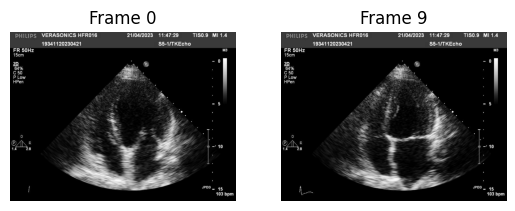

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(data[:,:,0,0], cmap='gray')
ax[0].set_title("Frame 0")

ax[1].axis('off')
ax[1].imshow(data[:,:,0,9], cmap='gray')
ax[1].set_title("Frame 9")
plt.show()


In [ ]:
registration_collection = []; moving_collection = []
fixed = ants.from_numpy(data[:,:,0,9])

for i in range(np.shape(data)[3]):
    moving = ants.from_numpy(data[:,:,0,i])
    moving_collection.append(np.asarray(data[:,:,0,i]))

    warped_image = registration(fixed, moving, type_of_transform=type_of_transform, syn_metric=syn_metric)
    np_reg = np.asarray(warped_image.numpy())
    registration_collection.append(np_reg)

explore_3D_array_comparison(np.asarray(moving_collection), np.asarray(registration_collection))

interactive(children=(IntSlider(value=17, description='SLICE', max=35), Output()), _dom_classes=('widget-inter…

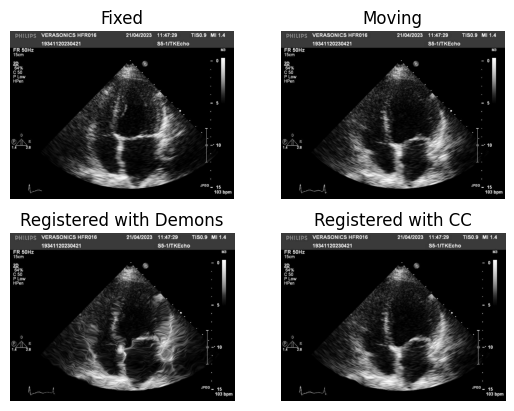

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0,0].axis('off')
ax[0,0].imshow(data[:,:,0,9], cmap='gray')
ax[0,0].set_title("Fixed")

ax[0,1].axis('off')
ax[0,1].imshow(moving_collection[19], cmap='gray')
ax[0,1].set_title("Moving")

ax[1,0].axis('off')
ax[1,0].imshow(registration_collection[19], cmap='gray')
ax[1,0].set_title("Registered with Demons")

registration_collection = []; moving_collection = []
fixed = ants.from_numpy(data[:,:,0,9])

for i in range(np.shape(data)[3]):
    moving = ants.from_numpy(data[:,:,0,i])
    moving_collection.append(np.asarray(data[:,:,0,i]))

    warped_image = registration(fixed, moving, type_of_transform=type_of_transform, syn_metric= 'CC')
    np_reg = np.asarray(warped_image.numpy())
    registration_collection.append(np_reg)

ax[1,1].axis('off')
ax[1,1].imshow(registration_collection[19], cmap='gray')
ax[1,1].set_title("Registered with CC")


plt.show()

In [ ]:
## Success Metric - absolute difference
fixed = np.asarray(data[:,:,0,9])
reg_images = np.asarray(registration_collection)
abs_diffs_images = []
abs_diffs_values = []
for i in range(np.shape(reg_images)[0]):
    abs_diffs_images.append(np.asarray(abs(reg_images[i,:,:] - fixed)))
    abs_diffs_values.append(round(np.sum(abs_diffs_images[-1])))


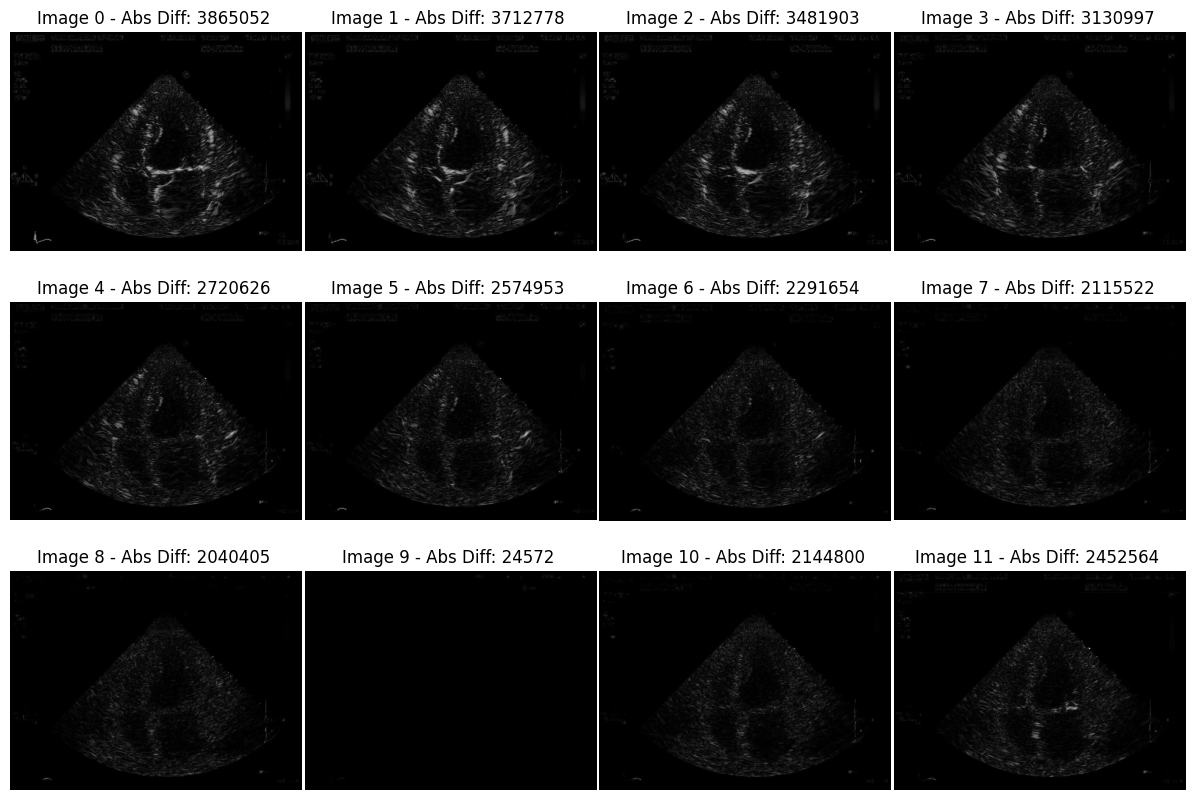

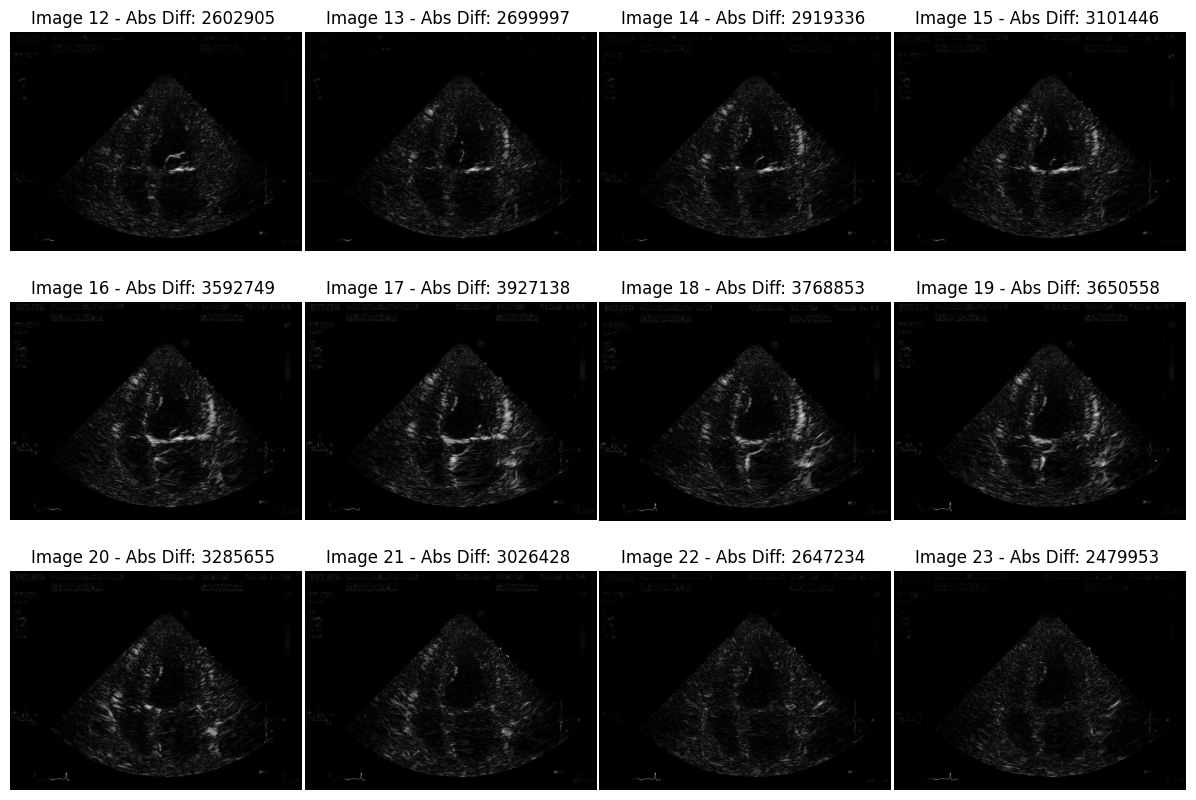

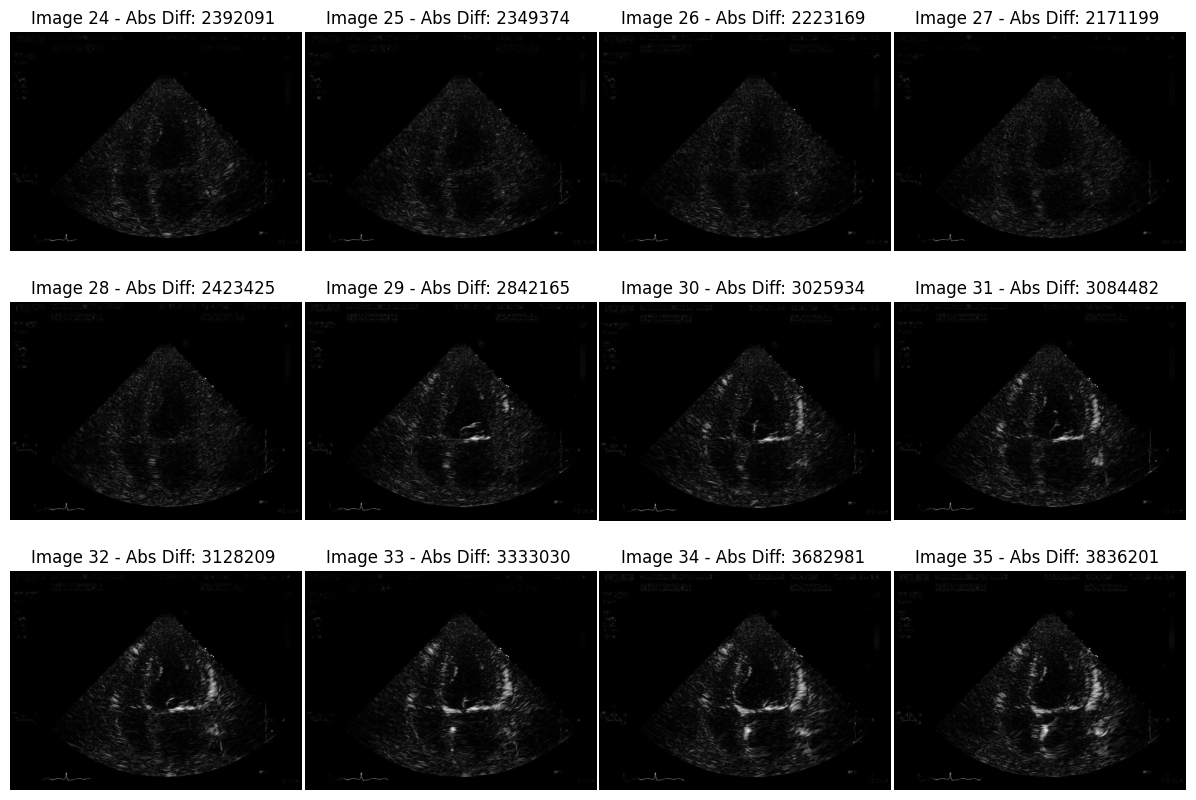

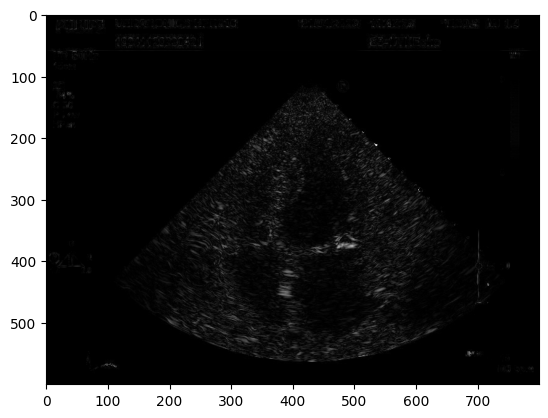

In [ ]:
plot_image_grid(np.asarray(abs_diffs_images)[0:36,:,:], 3, 4, title_string="Abs Diff", title_array=abs_diffs_values, number_of_figures=3)
plt.imshow(np.asarray(abs_diffs_images)[11,:,:], cmap='gray')

Text(0.5, 1.0, 'Absolute Difference of Registered Images - Metric: demons')

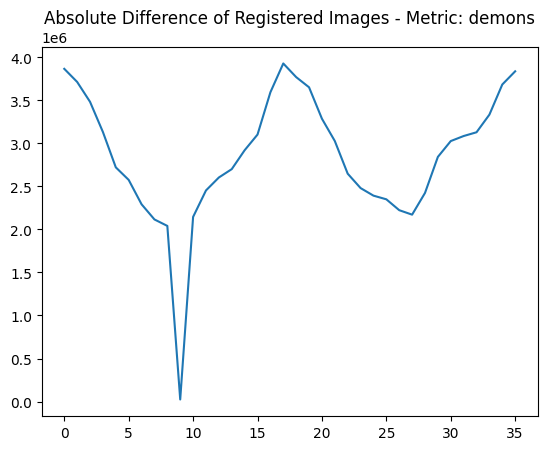

In [ ]:
plt.plot(abs_diffs_values)
plt.title(f"Absolute Difference of Registered Images - Metric: {syn_metric}")


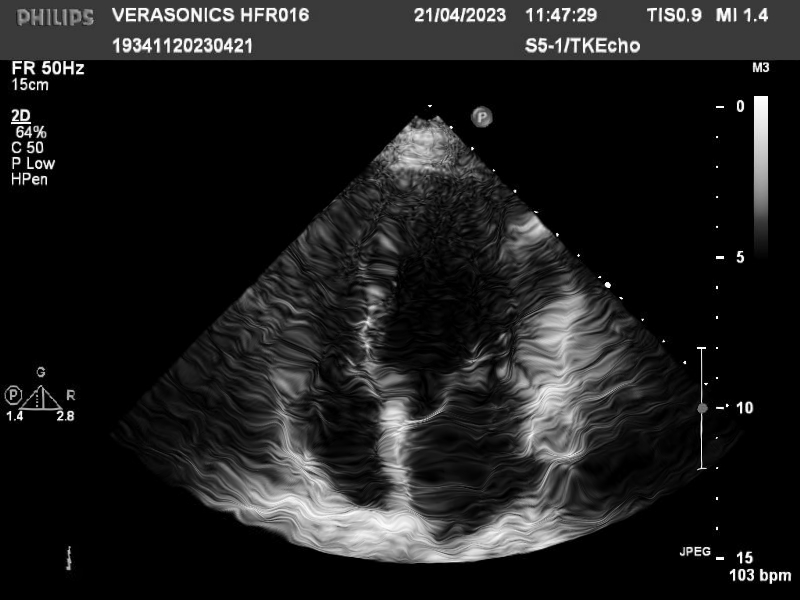
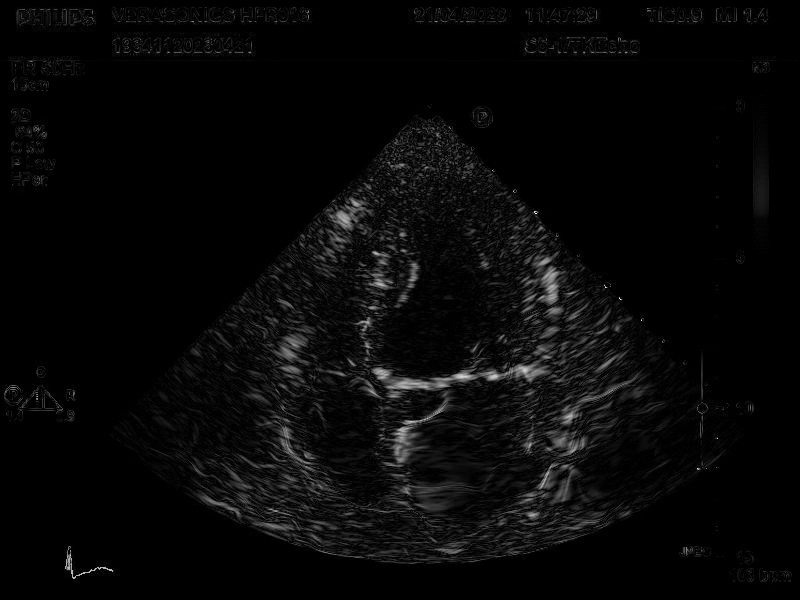

In [ ]:
leafmap.image_comparison(reg_images[0,:,:],np.asarray(abs_diffs_images)[0,:,:])